In [1]:
from scipy.io import wavfile
import IPython.display as ipd

f_d, sound = wavfile.read('Large Wide Echo Hall edited.wav')
ipd.Audio('Large Wide Echo Hall edited.wav')

22050
[ 6.6527730e-04 -3.4370918e-03  9.5547400e-03 ...  7.2293566e-05
 -5.7934399e-04 -3.6425784e-04]


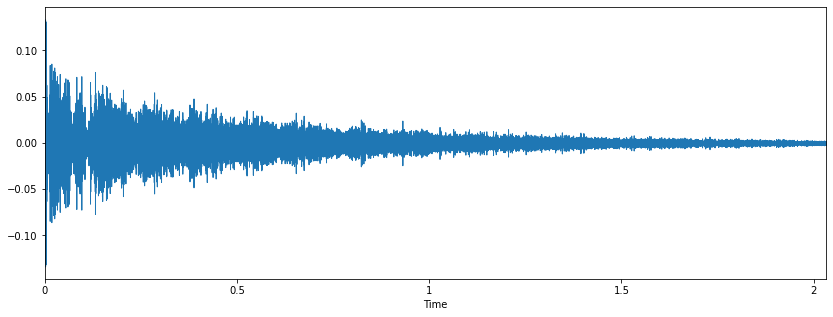

In [2]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
#Impulse Response
x, sr = librosa.load('Large Wide Echo Hall edited.wav')
print(sr)
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
print(x)

In [3]:
ipd.Audio('acoustic.wav')

In [5]:
import numpy as np
import time
from math import floor

IN, sr = librosa.load('acoustic.wav')
x, sr = librosa.load('Large Wide Echo Hall edited.wav')
IR = x[:256]
N = 256 #sample length
print(sr)

#Convolution with overlap-add method, no fft
def summa(x,y,i):
    summa = 0
    for j in range(len(x) + len(y) - 2):
        if i-j >= 0 and j < len(x) and i-j < len(y):
            summa += x[j]*y[i-j]
        else:
            break
    return summa

t1 = time.time()

OUT = np.zeros(len(IN) + len(IR))
for i in range(floor(len(IN)/N) - 1):
    x = IN[i*N:(i+1)*N]
    z = np.zeros(len(x) + len(IR) - 1)
    for j in range(len(x) + len(IR) - 1):
        z[j] = summa(x, IR, j)
        OUT[i*N + j] += z[j]
    
t2 = time.time()
print("No FFT: " + str(int(t2-t1)) + " seconds :(")

ipd.Audio(OUT, rate = sr)


22050
No FFT: 35 seconds :(


In [ ]:
IN, sr = librosa.load('acoustic.wav')
x, sr = librosa.load('Large Wide Echo Hall edited.wav')
IR = x[:256]
N = 256 #sample length
print(sr)

#With FFT